<a href="https://colab.research.google.com/github/Arpita-314/Applied-Data-Science-with-Python/blob/main/us_accidents_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## US Accidents Exploratory Data Analysis

TODO -talk about EDA

TODO - talk about the dataset (source, what it contains, how it will be useful)
  - Kaggle
  - information about accidents
  - can be useful to prevent accidents
  - mention that this does not contain data about NY

In [1]:
print('Hello World')
!pip install jovian --upgrade -q
import jovian
jovian.set_project('us-accidents-analysis')

Hello World
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.6/68.6 kB 1.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [2]:
pip install opendatasets --upgrade --quiet

In [3]:
import opendatasets as od

dataset_url = 'https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents'

od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: paularpita
Your Kaggle Key: ··········


100%|██████████| 653M/653M [00:18<00:00, 37.4MB/s]


# Data Download

In [13]:
data_filename = './us-accidents/US_Accidents_March23.csv'

In [5]:
# import pandas as pd

# data_filename = './us-accidents/US_Accidents_March23.csv'

# batch_size = 500

# for df in pd.read_csv(data_filename, chunksize=batch_size):
#     print(df.shape)

##########data preparation and cleaning

1. load the file using pandas
2. look at some information about the files
3. fix any missing or incorrect values


#######exploratory analysis and visualization

In [6]:
# #################pandas
# %%time
# import pandas as pd

# dtypes = {
#     "row_id": "int64",
#     "timestamp": "int64",
#     "user_id": "int32",
#     "content_id": "int16",
#     "content_type_id": "boolean",
#     "task_container_id": "int16",
#     "user_answer": "int8",
#     "answered_correctly": "int8",
#     "prior_question_elapsed_time": "float32",
#     "prior_question_had_explanation": "boolean"
# }

# df = pd.read_csv(data_filename, dtype=dtypes)

# print("Data size", df.shape)

In [14]:
#################dask
%%time
import dask.dataframe as dd

dtypes = {
    "row_id": "int64",
    "timestamp": "int64",
    "user_id": "int32",
    "content_id": "int16",
    "content_type_id": "boolean",
    "task_container_id": "int16",
    "user_answer": "int8",
    "answered_correctly": "int8",
    "prior_question_elapsed_time": "float32",
    "prior_question_had_explanation": "boolean"
}

df = dd.read_csv(data_filename,  dtype=dtypes).compute()

print("Train size:", df.shape)

Train size: (7728394, 46)
CPU times: user 2min 26s, sys: 18.4 s, total: 2min 45s
Wall time: 2min 10s


In [11]:
df.columns

NameError: ignored

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7728394 entries, 0 to 173289
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)        

In [10]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,7.728394e+06,7.728394e+06,7.728394e+06,4.325632e+06,4.325632e+06,7.728394e+06,7.564541e+06,5.729375e+06,7.554250e+06,7.587715e+06,7.551296e+06,7.157161e+06,5.524808e+06
mean,2.212384e+00,3.620119e+01,-9.470255e+01,3.626183e+01,-9.572557e+01,5.618423e-01,6.166329e+01,5.825105e+01,6.483104e+01,2.953899e+01,9.090376e+00,7.685490e+00,8.407210e-03
std,4.875313e-01,5.076079e+00,1.739176e+01,5.272905e+00,1.810793e+01,1.776811e+00,1.901365e+01,2.238983e+01,2.282097e+01,1.006190e+00,2.688316e+00,5.424983e+00,1.102246e-01
min,1.000000e+00,2.455480e+01,-1.246238e+02,2.456601e+01,-1.245457e+02,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.339963e+01,-1.172194e+02,3.346207e+01,-1.177543e+02,0.000000e+00,4.900000e+01,4.300000e+01,4.800000e+01,2.937000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.582397e+01,-8.776662e+01,3.618349e+01,-8.802789e+01,3.000000e-02,6.400000e+01,6.200000e+01,6.700000e+01,2.986000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.008496e+01,-8.035368e+01,4.017892e+01,-8.024709e+01,4.640000e-01,7.600000e+01,7.500000e+01,8.400000e+01,3.003000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,4.900220e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,4.417500e+02,2.070000e+02,2.070000e+02,1.000000e+02,5.863000e+01,1.400000e+02,1.087000e+03,3.647000e+01


In [11]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

numeric_df = df.select_dtypes(include=numerics)
len(numeric_df.columns)

13

Percentage of missing values per column

In [12]:
missing_percentages = df.isna().sum().sort_values(ascending=False) / len(df)
missing_percentages
##each value gets replaced by true or false
##sum gives per column count of missing values

End_Lat                  4.402935e-01
End_Lng                  4.402935e-01
Precipitation(in)        2.851286e-01
Wind_Chill(F)            2.586590e-01
Wind_Speed(mph)          7.391355e-02
Visibility(mi)           2.291524e-02
Wind_Direction           2.267043e-02
Humidity(%)              2.253301e-02
Weather_Condition        2.244438e-02
Temperature(F)           2.120143e-02
Pressure(in)             1.820288e-02
Weather_Timestamp        1.555666e-02
Nautical_Twilight        3.007869e-03
Civil_Twilight           3.007869e-03
Sunrise_Sunset           3.007869e-03
Astronomical_Twilight    3.007869e-03
Airport_Code             2.928810e-03
Street                   1.406372e-03
Timezone                 1.010300e-03
Zipcode                  2.477876e-04
City                     3.273643e-05
Description              6.469649e-07
Traffic_Signal           0.000000e+00
Roundabout               0.000000e+00
Station                  0.000000e+00
Stop                     0.000000e+00
Traffic_Calm

In [13]:
missing_percentages[missing_percentages !=0]
#users[users > 0]
##boolean series use as index

End_Lat                  4.402935e-01
End_Lng                  4.402935e-01
Precipitation(in)        2.851286e-01
Wind_Chill(F)            2.586590e-01
Wind_Speed(mph)          7.391355e-02
Visibility(mi)           2.291524e-02
Wind_Direction           2.267043e-02
Humidity(%)              2.253301e-02
Weather_Condition        2.244438e-02
Temperature(F)           2.120143e-02
Pressure(in)             1.820288e-02
Weather_Timestamp        1.555666e-02
Nautical_Twilight        3.007869e-03
Civil_Twilight           3.007869e-03
Sunrise_Sunset           3.007869e-03
Astronomical_Twilight    3.007869e-03
Airport_Code             2.928810e-03
Street                   1.406372e-03
Timezone                 1.010300e-03
Zipcode                  2.477876e-04
City                     3.273643e-05
Description              6.469649e-07
dtype: float64

In [14]:
type(missing_percentages)

pandas.core.series.Series

<Axes: >

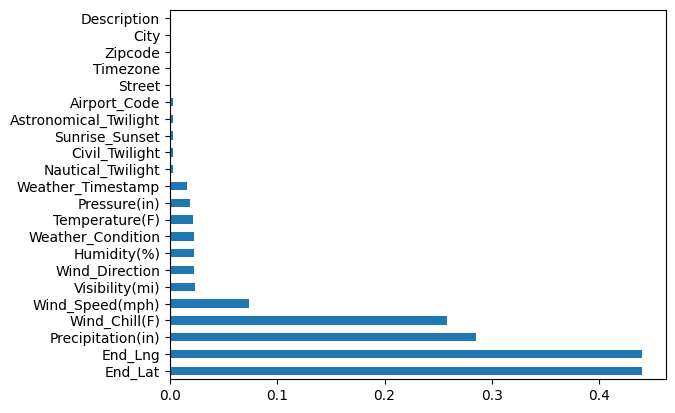

In [15]:
missing_percentages[missing_percentages !=0].plot(kind='barh')

if something is missing half the time it is probably not useful and not obliged half the time so we may choose to skip it from analysis......Remove columns that you don't want to use

##Exploratory Data Analysis

Columns
1. City
2. Start Time
3. Start Lat, Start Long
4. Temperature
5. Weather_Condition

In [16]:
df.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

###City

In [17]:
cities = df.City.unique()
len(cities)
cities[:20]

array(['Dayton', 'Reynoldsburg', 'Williamsburg', 'Westerville',
       'Columbus', 'Miamisburg', 'Johnstown', 'Dublin',
       'Canal Winchester', 'Lebanon', 'Sabina', 'Goshen', 'Waynesville',
       'Springboro', 'Carroll', 'Oregonia', 'Independence',
       'Maple Heights', 'Grove City', 'Findlay'], dtype=object)

In [18]:
cities_by_accident = df.City.value_counts()
cities_by_accident

Miami                           186917
Houston                         169609
Los Angeles                     156491
Charlotte                       138652
Dallas                          130939
                                 ...  
Benkelman                            1
Old Appleton                         1
Wildrose                             1
Mc Nabb                              1
American Fork-Pleasant Grove         1
Name: City, Length: 13678, dtype: int64

In [19]:
"New York" in df.City

False

In [20]:
#list(cities_by_accident)

<Axes: >

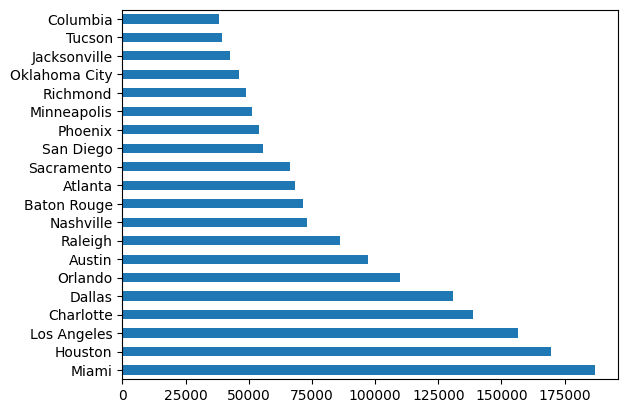

In [21]:
cities_by_accident[:20].plot(kind='barh')

In [22]:
import seaborn as sns
sns.set_style("darkgrid")

<ipython-input-23-1f460903cad6>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cities_by_accident)


<Axes: xlabel='City', ylabel='Density'>

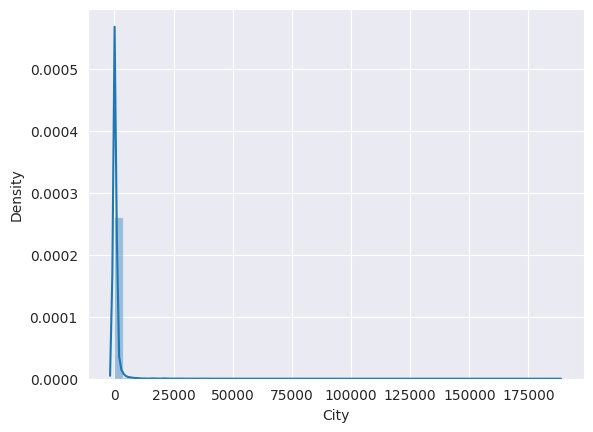

In [23]:
sns.distplot(cities_by_accident)

In [24]:
high_accident_cities = cities_by_accident[cities_by_accident >= 1000]
low_accident_cities = cities_by_accident[cities_by_accident < 1000]

In [25]:
len(high_accident_cities) / len(cities)

####op comes in divided by 100 percentages

0.08904159660793917

<ipython-input-26-50976d58a416>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(high_accident_cities)


<Axes: xlabel='City', ylabel='Density'>

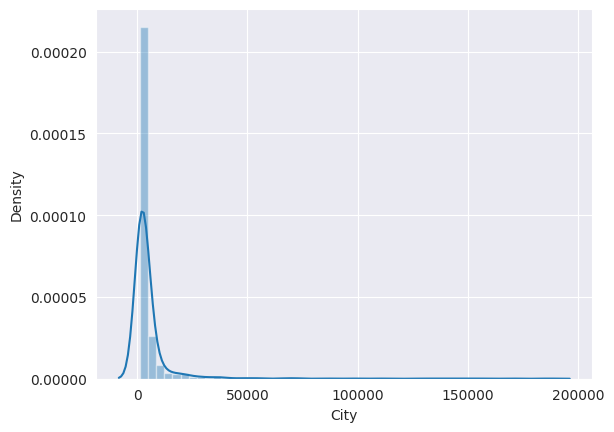

In [26]:
sns.distplot(high_accident_cities)

<Axes: xlabel='City', ylabel='Count'>

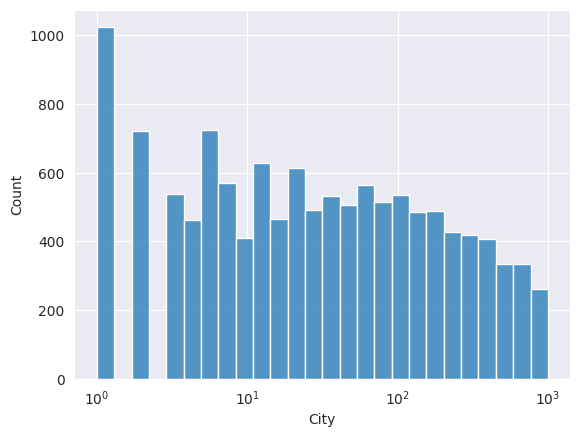

In [27]:
sns.histplot(low_accident_cities, log_scale = True)

In [28]:
cities_by_accident[cities_by_accident == 1]
##########discrepancy for cities with 1 accident best avoided

Lake Andes                      1
Catoctin                        1
Duck Hill                       1
Westbrookville                  1
Saint Croix                     1
                               ..
Benkelman                       1
Old Appleton                    1
Wildrose                        1
Mc Nabb                         1
American Fork-Pleasant Grove    1
Name: City, Length: 1023, dtype: int64

###Start Time

In [10]:
df.Start_Time

NameError: ignored

In [30]:
#df.Start_Time[0]
#####yyyy-mm-dd standard format

In [8]:
import pandas as pd

In [9]:
#######in order to convert into dates
df.Start_Time = pd.to_datetime(df.Start_Time)

NameError: ignored

In [7]:
df.Start_Time[0]
#####should give a timestamp so no real plot can't be done
########what are the zeros here?

NameError: ignored

In [34]:
 pd.DatetimeIndex(df.Start_Time).hour
 #####returns in the form of a list

Int64Index([ 5,  6,  6,  7,  7,  7,  7,  7,  8,  8,
            ...
            17, 17, 17, 17, 18, 18, 19, 19, 19, 18],
           dtype='int64', name='Start_Time', length=7728394)

<Axes: xlabel='Start_Time', ylabel='Count'>

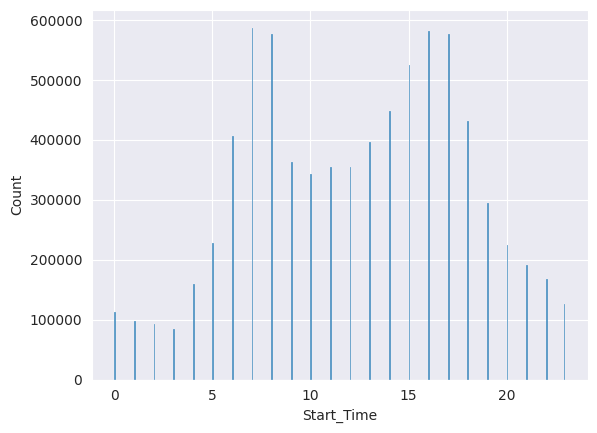

In [35]:
sns.histplot(df.Start_Time.dt.hour)

Figure out how to show percentages

<ipython-input-36-df8c3038e822>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Start_Time.dt.hour, bins = 24, kde= False, norm_hist = True)


<Axes: xlabel='Start_Time'>

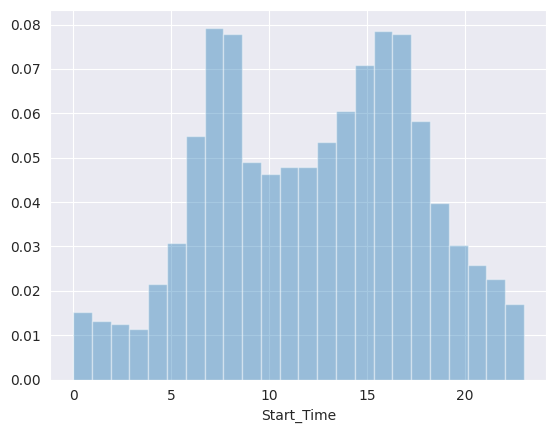

In [36]:
sns.distplot(df.Start_Time.dt.hour, bins = 24, kde= False, norm_hist = True)

In [37]:
# sns.distplot(df.Start_Time.dt.hour / len(df), bins =24, kde=False)
# ######understand the process of binning here
# #### divide by len to convert into percentages

- A high percentage of accidents occur between 7 to 9 am (probably people in a hurry to get to work)
- Next highest percentage is 3 pm to 6 pm.



<ipython-input-38-68e9f719d5df>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Start_Time.dt.dayofweek, bins = 7, kde= False, norm_hist = True)


<Axes: xlabel='Start_Time'>

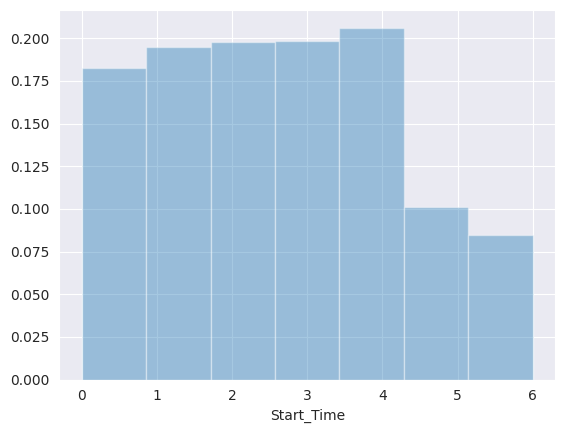

In [38]:
sns.distplot(df.Start_Time.dt.dayofweek, bins = 7, kde= False, norm_hist = True)

Is the distribution by hour the same on weekends as on weekdays?

In [39]:
df.Start_Time.dt.dayofweek == 6
######false and trues

0         False
1         False
2         False
3         False
4         False
          ...  
173285    False
173286    False
173287    False
173288    False
173289    False
Name: Start_Time, Length: 7728394, dtype: bool

<ipython-input-40-d303f0786792>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sundays_start_time.dt.hour, bins = 24, kde= False, norm_hist = True)


<Axes: xlabel='Start_Time'>

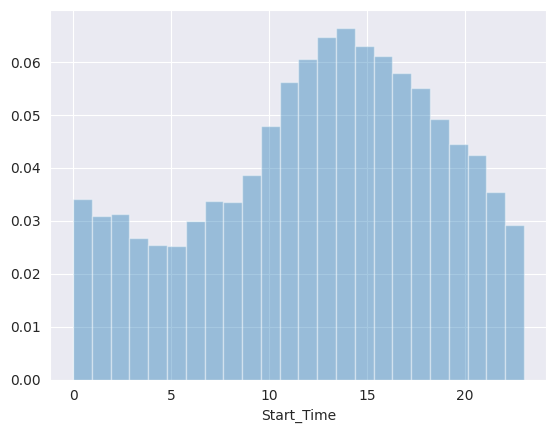

In [40]:
sundays_start_time = df.Start_Time[df.Start_Time.dt.dayofweek == 6 ]
sns.distplot(sundays_start_time.dt.hour, bins = 24, kde= False, norm_hist = True)
######plugging in as index
##gaussian curve

On sundays, the peak occurs between 10 am and 3 pm unlike weekdays

<ipython-input-41-9f1ecf86302d>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(monday_start_time.dt.hour, bins = 24, kde= False, norm_hist = True)


<Axes: xlabel='Start_Time'>

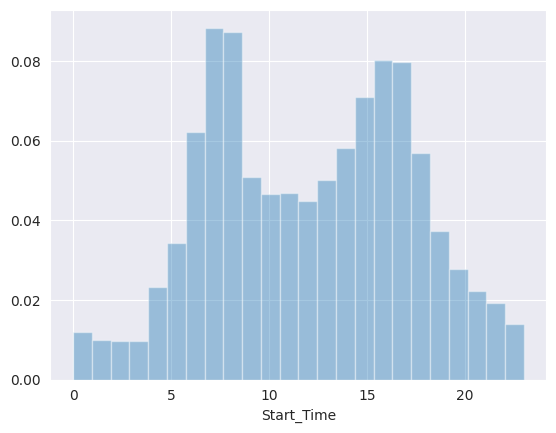

In [41]:
monday_start_time = df.Start_Time[df.Start_Time.dt.dayofweek == 0 ]
sns.distplot(monday_start_time.dt.hour, bins = 24, kde= False, norm_hist = True)
######plugging in as index
###bell curve

In [5]:
df.Start_Time.dt.year

NameError: ignored

In [4]:
df_2019 = df[df.Start_Time.dt.year == 2019]
###looking the data of 2019 after putting it into a df
sns.distplot(df_2019.Start_Time.dt.month, bins = 12, kde= False, norm_hist = True)

NameError: ignored

The peaks are in Jan-Feb and Nov-Dec?
- Why are the peaks at the start and the end of the year. Explain the reasons?
- Can you explain the month-wise trend of accidents?

In [ ]:
'NY' in df.State

##Ask and answer questions

1. Are there more accidents in warmer or colder areas?
2. Which 5 states have the highest no of accidents? How about per capita?
3. Does NY show up in the data? If yes, why is the count lower in the most populated city?
4. Among the top 100 cities in no. of accidents, which state do they belong to most frequently?
5. What time of the day are the accidents most frequent in?
6. Which days of the week have the most accident?
7. Which months have the most accident?
8. What is the trend of accidents year over year?
9. When is accidents per unit of time the highest?



##Summary and conclusions

Insights:
- No data from New York
- The number of accidents per city decreases exponentially
- Less than 5% cities have more than 1000 yearly accidents.
- Over 1000 cities have reported just 1 accident(need to investigate)

Maybe analyse some other columns afterwards